<a id='top'></a>

#  First Steps with Db2 and Jupyter Notebook
Author: Christian Lenke, IBM<br>
Version: 2018-11-18 

My first Jupyther Notebook with Db2

## Table of content

* [Installation](#installation)
<p>
* [Experiments with Db2 Driver and SQL Alchemy](#db2driver)
  * [Connect to Db2](#ddconnect)
  * [Line and cell level SQL magic](#ddsqlmagic)
  * [Simple charts](#ddcharts)      
<p>
* [Using Jupyther Extensions for Db2](#db2extensions)
  * [Loading the extensions](#db2extensions)
  * [Connect to Db2](#exconnect)
  * [Line and cell level SQL magic with extensions](#exsqlmagic)    
     * [Limiting the number of rows of the displayed result set](#exlimited)
     * [Unlimiting the number of rows of the displayed result set](#exunlimited)    
  * [Simple charts](#excharts)    
  * [Pandas data frames with Db2 extensions](#expandas)        
     * [Displaying the data frame with pixiedust](#exwpixie)        
     * [Displaying the data frame without pixiedust](#exwopixie)            
  * [Data frames with conditional formatting](#exconditional)            
<p>
* [Experiments with Panda Data Frames w/o Db2 Extensions](#nativedataframes)
  * [Connect to Db2](#nativedataframes)
  * [Creating the data frame](#pdcreate)
  * [Displaying the pandas frame as table with pixiedust](#pdwpixie)        
  * [Loading the statement text from ...](#pdsqlvar)            
     * [a variable](#pdsqlvar)            
     * [a library (from another Notebook)](#pdsqllib)            
     * [a file](#pdsqlfile)                
  * [Display a subset or all rows / columns of a result set](#pdsubset)            
<p>
* [Graphs using matplotlib](#matplot)
  * [Bar chart for a simple result set](#matplot)
  * [Some more advanced features](#mpsort)            
     * [Bar sorting](#mpsort) 
     * [Where to put the logic? Simpler and more flexible in Notebook!](#mplogic)     
  * [Line graphs / multiple lines](#mplines) 
  * [Subplots (distinct axes)](#mpsubplots) 
  * [Mouseover / Tooltips](#mpmouseover) 
<p>
* [Experiments with Pandas](#pandas_experiments)   
  * [Joins](#pandas_experiments)    

[Back to Top](#top)
<a id='installation'></a>

## Installation

Setting the environment

In [1]:
import sys,os,os.path
import getpass
os.environ['IBM_DB_HOME']='C:\Program Files\IBM\SQLLIB'

One time action to install the Db2 packages and other packages.

In [2]:
# !pip install ipython-sql

# Install Db2 Driver
# Uncomment the following line for Db2 11.1 and Anaconda 2
# !pip install ibm_db

# Install Db2 Driver
# Uncomment the following line for Db2 11.1 and Anaconda 3
# !pip install "ibm_db==2.0.8a"

# Install SQL Alchemy
# !pip install ibm_db_sa

# Install qgrid which is required for Python Db2 Extensions (db2.iphynb)
#!pip install qgrid

# Install pixiedust which is required for Python Db2 Extensions (db2.iphynb)
#!pip install pixiedust

[Back to Top](#top)
<a id='db2driver'></a>

## 1) Experiments with Db2 Driver and SQL Alchemy

Import of all required libraries <br> Execute the cell in case you restarted the Anaconda kernel

In [3]:
import ibm_db
import ibm_db_sa
import sqlalchemy
%load_ext sql

[Back to Top](#top)
<a id='ddconnect'></a>

### Connect to Db2

In [4]:
# Setting the connection variables
db2host  = 'localhost'
db2port  = 50000
db2alias = 'SAMPLE'
db2user  = 'DE094692'
# Prompt for password
db2password = getpass.getpass('Password for database ' + db2alias + ': '); 

Password for database SAMPLE: ········


Connect

In [5]:
#Standard ibm_db_sa Syntax
#  Syntax only works as long the Db2 Extensions have not been loaded
%sql db2+ibm_db://$db2user:$db2password@$db2host:$db2port/$db2alias

'Connected: DE094692@SAMPLE'

In [6]:
%sql set current schema = 'DE094692'

 * db2+ibm_db://DE094692:***@localhost:50000/SAMPLE
Done.


[]

[Back to Top](#top)
<a id='ddsqlmagic'></a>

### Line and cell level SQL magic

Line level sql magic

In [7]:
#set some variables
workdept = 'A00'
#execute SQL
%sql SELECT empno, lastname from employee where workdept = '{workdept}' order by empno;

 * db2+ibm_db://DE094692:***@localhost:50000/SAMPLE
Done.


empno,lastname
000010,HAAS
000110,LUCCHESSI
000120,O'CONNELL
200010,HEMMINGER
200120,ORLANDO


Line level sql magic <br> Multi line SQL and host variable syntax

In [8]:
#set some variables
workdept1 = 'A00'
workdept2 = 'E11'

# use "\" to concatenate multiple lines of sql text
#attention: no trailing blanks after "\" allowed

#execute SQL
%sql SELECT e.EMPNO, e.FIRSTNME, e.MIDINIT, e.LASTNAME, e.WORKDEPT, e.PHONENO, e.HIREDATE, e.JOB \
, e.EDLEVEL, e.SEX, e.BIRTHDATE, e.SALARY, e.BONUS, e.COMM, d.deptname, d.location \
from employee e, \
     department d \
where e.workdept = d.deptno \
  and workdept in (:workdept1, :workdept2) \
order by empno;

# Remarks
#   All rows of result set displayed
#   Horizontal scroll bar automatically when result set is too wide to fit on screen
#   Vertical scroll bar automatically when result set is too wide to fit on screen
#   Standard: Data subsetting (head and tail)
#   No inline comments allowed (neither "#" nor "--")

 * db2+ibm_db://DE094692:***@localhost:50000/SAMPLE
Done.


empno,firstnme,midinit,lastname,workdept,phoneno,hiredate,job,edlevel,sex,birthdate,salary,bonus,comm,deptname,location
000010,YYYY,I,HAAS,A00,3978,1995-01-01,PRES,18,F,1963-08-24,152750.00,1000.00,4220.00,SPIFFY COMPUTER SERVICE DIV.,Hamburg
000090,EILEEN,W,HENDERSON,E11,5498,2000-08-15,MANAGER,16,F,1971-05-15,89750.00,600.00,2380.00,OPERATIONS,None
000110,VINCENZO,G,LUCCHESSI,A00,3490,1988-05-16,SALESREP,19,M,1959-11-05,66500.00,900.00,3720.00,SPIFFY COMPUTER SERVICE DIV.,Hamburg
000120,SEAN,,O'CONNELL,A00,2167,1993-12-05,CLERK,14,M,1972-10-18,49250.00,600.00,2340.00,SPIFFY COMPUTER SERVICE DIV.,Hamburg
000280,ETHEL,R,SCHNEIDER,E11,8997,1997-03-24,OPERATOR,17,F,1976-03-28,36250.00,500.00,2100.00,OPERATIONS,None
000290,JOHN,R,PARKER,E11,4502,2006-05-30,OPERATOR,12,M,1985-07-09,35340.00,300.00,1227.00,OPERATIONS,None
000300,PHILIP,X,SMITH,E11,2095,2002-06-19,OPERATOR,14,M,1976-10-27,37750.00,400.00,1420.00,OPERATIONS,None
000310,MAUDE,F,SETRIGHT,E11,3332,1994-09-12,OPERATOR,12,F,1961-04-21,35900.00,300.00,1272.00,OPERATIONS,None
200010,DIAN,J,HEMMINGER,A00,3978,1995-01-01,SALESREP,18,F,1973-08-14,46500.00,1000.00,4220.00,SPIFFY COMPUTER SERVICE DIV.,Hamburg
200120,GREG,,ORLANDO,A00,2167,2002-05-05,CLERK,14,M,1972-10-18,39250.00,600.00,2340.00,SPIFFY COMPUTER SERVICE DIV.,Hamburg


Cell level sql magic

In [9]:
workdept3 = 'A00'
workdept4 = 'E11'

In [10]:
%%sql 
-- Findings
--   SQL comments allowed 
--   But cell has to start with "%%sql" in the first row
--   Variables have to be defined outside the cell
--   Horizontal scroll bar automatically when result set is too wide to fit on screen
--   Vertical scroll bar automatically when result set is too wide to fit on screen
--   Standard: Data subsetting (head and tail)
SELECT e.EMPNO, e.FIRSTNME, e.MIDINIT, e.LASTNAME, e.WORKDEPT, e.PHONENO, e.HIREDATE, e.JOB, 
     e.EDLEVEL, e.SEX, e.BIRTHDATE, e.SALARY, e.BONUS, e.COMM, d.deptname, d.location 
from employee e, 
     department d 
where e.workdept = d.deptno 
  and workdept in (:workdept3, :workdept4)
order by empno;

 * db2+ibm_db://DE094692:***@localhost:50000/SAMPLE
Done.


empno,firstnme,midinit,lastname,workdept,phoneno,hiredate,job,edlevel,sex,birthdate,salary,bonus,comm,deptname,location
000010,YYYY,I,HAAS,A00,3978,1995-01-01,PRES,18,F,1963-08-24,152750.00,1000.00,4220.00,SPIFFY COMPUTER SERVICE DIV.,Hamburg
000090,EILEEN,W,HENDERSON,E11,5498,2000-08-15,MANAGER,16,F,1971-05-15,89750.00,600.00,2380.00,OPERATIONS,None
000110,VINCENZO,G,LUCCHESSI,A00,3490,1988-05-16,SALESREP,19,M,1959-11-05,66500.00,900.00,3720.00,SPIFFY COMPUTER SERVICE DIV.,Hamburg
000120,SEAN,,O'CONNELL,A00,2167,1993-12-05,CLERK,14,M,1972-10-18,49250.00,600.00,2340.00,SPIFFY COMPUTER SERVICE DIV.,Hamburg
000280,ETHEL,R,SCHNEIDER,E11,8997,1997-03-24,OPERATOR,17,F,1976-03-28,36250.00,500.00,2100.00,OPERATIONS,None
000290,JOHN,R,PARKER,E11,4502,2006-05-30,OPERATOR,12,M,1985-07-09,35340.00,300.00,1227.00,OPERATIONS,None
000300,PHILIP,X,SMITH,E11,2095,2002-06-19,OPERATOR,14,M,1976-10-27,37750.00,400.00,1420.00,OPERATIONS,None
000310,MAUDE,F,SETRIGHT,E11,3332,1994-09-12,OPERATOR,12,F,1961-04-21,35900.00,300.00,1272.00,OPERATIONS,None
200010,DIAN,J,HEMMINGER,A00,3978,1995-01-01,SALESREP,18,F,1973-08-14,46500.00,1000.00,4220.00,SPIFFY COMPUTER SERVICE DIV.,Hamburg
200120,GREG,,ORLANDO,A00,2167,2002-05-05,CLERK,14,M,1972-10-18,39250.00,600.00,2340.00,SPIFFY COMPUTER SERVICE DIV.,Hamburg


[Back to Top](#top)
<a id='ddcharts'></a>

### Charts

Bar chart

In [11]:
# The result of a query can be stored as data frame
result = %sql select workdept, count(*) as num_employees from employee group by workdept;

 * db2+ibm_db://DE094692:***@localhost:50000/SAMPLE
Done.


In [12]:
result.bar()

# Q: How to avoid <Output>
# Q: has to be executed twice to display bars. Why?

<BarContainer object of 8 artists>

Pie chart

([<matplotlib.patches.Wedge at 0x21cbcd31c88>,
 [Text(1.02396,0.401875,'A00'),
  Text(0.74819,0.806357,'B01'),
  Text(0.401875,1.02396,'C01'),
  Text(-0.74819,0.806357,'D11'),
  Text(-0.952628,-0.55,'D21'),
  Text(-0.477272,-0.991066,'E01'),
  Text(0.163947,-1.08771,'E11'),
  Text(0.991066,-0.477272,'E21')])

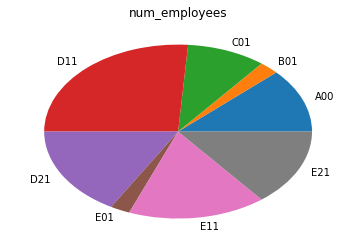

In [13]:
result.pie()

# Q: How to avoid <matplotlib output>

Automatic vertical scroll bars

In [14]:
%sql SELECT creator, name, type, tbspace, card from sysibm.systables order by creator, name;

# Remarks
#   Only max rows (head & tail) of result set displayed
#   Horizontal scroll bar automatically
#   Vertical scroll bar automatically

 * db2+ibm_db://DE094692:***@localhost:50000/SAMPLE
Done.


creator,name,TYPE,tbspace,card
ASN,IBMQREP_MCGPARMS,T,QALSN4,0
ASN,IBMQREP_MCGSYNC,T,QALSN4,0
BASF,TEST2,T,USERSPACE1,-1
BAYER,BEWEGUNGSDATEN,T,USERSPACE1,2
BAYER,STAMMDATEN,T,USERSPACE1,-1
BITMARCK,IBMQREP_CAPMON,T,IBMDB2SAMPLEREL,20135
DE094602,CUST_LINEAGE,T,USERSPACE1,2
DE0946092,V1,V,None,-1
DE094692,ACT,T,USERSPACE1,18
DE094692,ADEFUSR,S,USERSPACE1,0


[Back to Top](#top)
<a id='db2extensions'></a>

## 2) Using Jupyter Extensions for Db2

The Db2 Extensions for Jupyther Notebooks (db2.ipynb) and many samples can be downloaded here: <br>
https://github.com/DB2-Samples/db2jupyter

Run Jupyther Extensions for Db2 <br> Execute the cell in case you restarted the Anaconda kernel

In [15]:
# Download db2.ipynb and place it in your Notebook directory
%run db2.ipynb

# The extensions import pandas, json, matplotlib, time, qgrid, pixiedust ...

Pixiedust database opened successfully


DB2 Extensions Loaded.


[Back to Top](#top)
<a id='exconnect'></a>

### Connect to Db2 (using Extensions)

In [16]:
db2user='DE094692'
# no password - CONNECT prompts for password when using "?"

db2host='localhost'
db2port=50000

# Database name when connecting to Db2 LUW
# Location name when connecting to Db2 z/OS
db2alias='SAMPLE'

#%sql CONNECT TO <database> USER <userid> USING <password | ?> HOST <ip address> PORT <port number>
%sql CONNECT TO $db2alias USER $db2user USING ? HOST $db2host PORT $db2port

Password [password]: ········
Connection successful.


[Back to Top](#top)
<a id='exsqlmagic'></a>

### Line and cell level SQL magic (using Extensions)

In [17]:
#set some variables
workdept1 = 'A00'
workdept2 = 'E11'

# use "\" to concatenate multiple lines of sql text
#attention: no trailing blanks after "\" allowed

#execute SQL
%sql SELECT e.EMPNO, e.FIRSTNME, e.MIDINIT, e.LASTNAME, e.WORKDEPT, e.PHONENO, e.HIREDATE, e.JOB \
, e.EDLEVEL, e.SEX, e.BIRTHDATE, e.SALARY, e.BONUS, e.COMM, d.deptname, d.location \
from employee e, \
     department d \
where e.workdept = d.deptno \
  and workdept in (:workdept1, :workdept2) \
order by empno;

# Remarks
#   Different behaviour from standard
#     Line numbers (index) have been added (pandas standard)
#     Only first 5 and last 5 records displayed
#     Only horizontal scroll bar / no vertical scroll bar

,EMPNO,FIRSTNME,MIDINIT,LASTNAME,WORKDEPT,PHONENO,HIREDATE,JOB,EDLEVEL,SEX,BIRTHDATE,SALARY,BONUS,COMM,DEPTNAME,LOCATION
0,000010,YYYY,I,HAAS,A00,3978,1995-01-01,PRES,18,F,1963-08-24,152750.0,1000.0,4220.0,SPIFFY COMPUTER SERVICE DIV.,Hamburg
1,000090,EILEEN,W,HENDERSON,E11,5498,2000-08-15,MANAGER,16,F,1971-05-15,89750.0,600.0,2380.0,OPERATIONS,None
2,000110,VINCENZO,G,LUCCHESSI,A00,3490,1988-05-16,SALESREP,19,M,1959-11-05,66500.0,900.0,3720.0,SPIFFY COMPUTER SERVICE DIV.,Hamburg
3,000120,SEAN,,O'CONNELL,A00,2167,1993-12-05,CLERK,14,M,1972-10-18,49250.0,600.0,2340.0,SPIFFY COMPUTER SERVICE DIV.,Hamburg
4,000280,ETHEL,R,SCHNEIDER,E11,8997,1997-03-24,OPERATOR,17,F,1976-03-28,36250.0,500.0,2100.0,OPERATIONS,None
5,000290,JOHN,R,PARKER,E11,4502,2006-05-30,OPERATOR,12,M,1985-07-09,35340.0,300.0,1227.0,OPERATIONS,None
6,000300,PHILIP,X,SMITH,E11,2095,2002-06-19,OPERATOR,14,M,1976-10-27,37750.0,400.0,1420.0,OPERATIONS,None
7,000310,MAUDE,F,SETRIGHT,E11,3332,1994-09-12,OPERATOR,12,F,1961-04-21,35900.0,300.0,1272.0,OPERATIONS,None
8,200010,DIAN,J,HEMMINGER,A00,3978,1995-01-01,SALESREP,18,F,1973-08-14,46500.0,1000.0,4220.0,SPIFFY COMPUTER SERVICE DIV.,Hamburg
9,200120,GREG,,ORLANDO,A00,2167,2002-05-05,CLERK,14,M,1972-10-18,39250.0,600.0,2340.0,SPIFFY COMPUTER SERVICE DIV.,Hamburg


[Back to Top](#top)
<a id='exlimited'></a>

### Limiting the number of rows of the displayed result set

In [18]:
workdept3 = 'A00'
workdept4 = 'E11'

Setting the option to display only 10 rows of the result set (top 5 and bottom 5)

In [19]:
%sql option MAXROWS 10

In [20]:
%%sql 
-- Findings
--   SQL comments allowed 
--   But cell has to start with "%%sql" in the first row
--   Variables have to be defined outside the cell
--   Only first 5 and last 5 records displayed
--   Automatic horizontal scroll bar
--   No vertical scroll bar
SELECT e.EMPNO, e.FIRSTNME, e.MIDINIT, e.LASTNAME, e.WORKDEPT, e.PHONENO, e.HIREDATE, e.JOB, 
     e.EDLEVEL, e.SEX, e.BIRTHDATE, e.SALARY, e.BONUS, e.COMM, d.deptname, d.location 
from employee e, 
     department d 
where e.workdept = d.deptno 
  and workdept in (:workdept3, :workdept4)
order by empno;

,EMPNO,FIRSTNME,MIDINIT,LASTNAME,WORKDEPT,PHONENO,HIREDATE,JOB,EDLEVEL,SEX,BIRTHDATE,SALARY,BONUS,COMM,DEPTNAME,LOCATION
0,000010,YYYY,I,HAAS,A00,3978,1995-01-01,PRES,18,F,1963-08-24,152750.0,1000.0,4220.0,SPIFFY COMPUTER SERVICE DIV.,Hamburg
1,000090,EILEEN,W,HENDERSON,E11,5498,2000-08-15,MANAGER,16,F,1971-05-15,89750.0,600.0,2380.0,OPERATIONS,None
2,000110,VINCENZO,G,LUCCHESSI,A00,3490,1988-05-16,SALESREP,19,M,1959-11-05,66500.0,900.0,3720.0,SPIFFY COMPUTER SERVICE DIV.,Hamburg
3,000120,SEAN,,O'CONNELL,A00,2167,1993-12-05,CLERK,14,M,1972-10-18,49250.0,600.0,2340.0,SPIFFY COMPUTER SERVICE DIV.,Hamburg
4,000280,ETHEL,R,SCHNEIDER,E11,8997,1997-03-24,OPERATOR,17,F,1976-03-28,36250.0,500.0,2100.0,OPERATIONS,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7,000310,MAUDE,F,SETRIGHT,E11,3332,1994-09-12,OPERATOR,12,F,1961-04-21,35900.0,300.0,1272.0,OPERATIONS,None
8,200010,DIAN,J,HEMMINGER,A00,3978,1995-01-01,SALESREP,18,F,1973-08-14,46500.0,1000.0,4220.0,SPIFFY COMPUTER SERVICE DIV.,Hamburg
9,200120,GREG,,ORLANDO,A00,2167,2002-05-05,CLERK,14,M,1972-10-18,39250.0,600.0,2340.0,SPIFFY COMPUTER SERVICE DIV.,Hamburg
10,200280,EILEEN,R,SCHWARTZ,E11,8997,1997-03-24,OPERATOR,17,F,1966-03-28,46250.0,500.0,2100.0,OPERATIONS,None


[Back to Top](#top)
<a id='exunlimited'></a>

In case the output should not be limited to the first n and the last m rows

In [21]:
%sql option MAXROWS -1

In [22]:
%%sql 
-- Findings
--   SQL comments allowed 
--   But cell has to start with "%%sql" in the first row
--   Variables have to be defined outside the cell
--   The option MAXROWS -1 causes the output of all rows (for "%sql" and "%%sql") 
--   Automatic horizontal scroll bar
--   No vertical scroll bar
SELECT e.EMPNO, e.FIRSTNME, e.MIDINIT, e.LASTNAME, e.WORKDEPT, e.PHONENO, e.HIREDATE, e.JOB, 
     e.EDLEVEL, e.SEX, e.BIRTHDATE, e.SALARY, e.BONUS, e.COMM, d.deptname, d.location 
from employee e, 
     department d 
where e.workdept = d.deptno 
  and workdept in (:workdept3, :workdept4)
order by empno;

,EMPNO,FIRSTNME,MIDINIT,LASTNAME,WORKDEPT,PHONENO,HIREDATE,JOB,EDLEVEL,SEX,BIRTHDATE,SALARY,BONUS,COMM,DEPTNAME,LOCATION
0,000010,YYYY,I,HAAS,A00,3978,1995-01-01,PRES,18,F,1963-08-24,152750.0,1000.0,4220.0,SPIFFY COMPUTER SERVICE DIV.,Hamburg
1,000090,EILEEN,W,HENDERSON,E11,5498,2000-08-15,MANAGER,16,F,1971-05-15,89750.0,600.0,2380.0,OPERATIONS,None
2,000110,VINCENZO,G,LUCCHESSI,A00,3490,1988-05-16,SALESREP,19,M,1959-11-05,66500.0,900.0,3720.0,SPIFFY COMPUTER SERVICE DIV.,Hamburg
3,000120,SEAN,,O'CONNELL,A00,2167,1993-12-05,CLERK,14,M,1972-10-18,49250.0,600.0,2340.0,SPIFFY COMPUTER SERVICE DIV.,Hamburg
4,000280,ETHEL,R,SCHNEIDER,E11,8997,1997-03-24,OPERATOR,17,F,1976-03-28,36250.0,500.0,2100.0,OPERATIONS,None
5,000290,JOHN,R,PARKER,E11,4502,2006-05-30,OPERATOR,12,M,1985-07-09,35340.0,300.0,1227.0,OPERATIONS,None
6,000300,PHILIP,X,SMITH,E11,2095,2002-06-19,OPERATOR,14,M,1976-10-27,37750.0,400.0,1420.0,OPERATIONS,None
7,000310,MAUDE,F,SETRIGHT,E11,3332,1994-09-12,OPERATOR,12,F,1961-04-21,35900.0,300.0,1272.0,OPERATIONS,None
8,200010,DIAN,J,HEMMINGER,A00,3978,1995-01-01,SALESREP,18,F,1973-08-14,46500.0,1000.0,4220.0,SPIFFY COMPUTER SERVICE DIV.,Hamburg
9,200120,GREG,,ORLANDO,A00,2167,2002-05-05,CLERK,14,M,1972-10-18,39250.0,600.0,2340.0,SPIFFY COMPUTER SERVICE DIV.,Hamburg


[Back to Top](#top)
<a id='excharts'></a>

### Charts

Bar chart

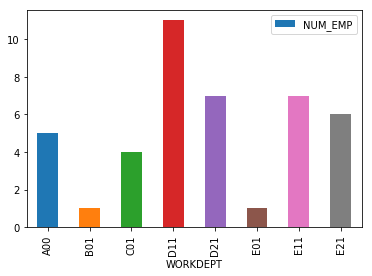

In [23]:
%sql -pb SELECT workdept, count(*) as num_emp from employee group by workdept;

Pie chart

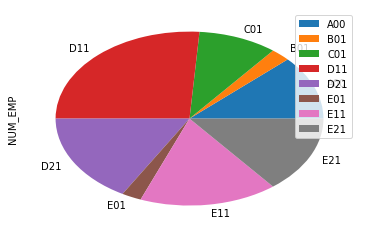

In [24]:
%sql -pp SELECT workdept, count(*) as num_emp from employee group by workdept;

[Back to Top](#top)
<a id='expandas'></a>

### Pandas data frames with Db2 extensions

In [25]:
#set some variables
workdept1 = 'A00'
workdept2 = 'E11'

# use "\" to concatenate multiple lines of sql text
#attention: no trailing blanks after "\" allowed

#load sql result set into a pandas data frame
result = %sql SELECT e.EMPNO, e.FIRSTNME, e.MIDINIT, e.LASTNAME, e.WORKDEPT, e.PHONENO, e.HIREDATE, e.JOB \
, e.EDLEVEL, e.SEX, e.BIRTHDATE, e.SALARY, e.BONUS, e.COMM, d.deptname, d.location \
from employee e, \
     department d \
where e.workdept = d.deptno \
  and workdept in (:workdept1, :workdept2) \
order by empno;

# Findings
#   When sql result is loaded into a data frame, the frame can be displayed as follows (using pixiedust)
#     horizontal and vertical scroll bars
#     convertable into a chart

First analysis of the numeric columns

In [26]:
result.describe()

,EDLEVEL,SALARY,BONUS,COMM
count,12.000000,12.000000,12.000000,12.000000
mean,15.250000,55949.166667,558.333333,2384.250000
std,2.562846,34482.224791,299.873711,1105.067676
min,12.000000,35340.000000,0.000000,1227.000000
25%,13.500000,36162.500000,375.000000,1383.000000
50%,15.000000,42750.000000,550.000000,2220.000000
75%,17.250000,53562.500000,675.000000,2715.000000
max,19.000000,152750.000000,1000.000000,4220.000000


In [27]:
result.sort_values(['WORKDEPT'], ascending=True, inplace=True)

[Back to Top](#top)
<a id='exwpixie'></a>

### Displaying the data frame using pixiedust (display)


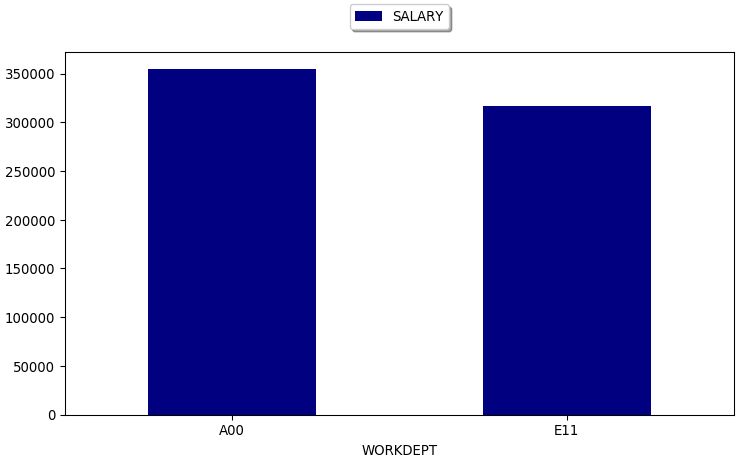

In [28]:
# using display(pandas data frame) to display the result set using pixiedust
display(result)

[Back to Top](#top)
<a id='exwopixie'></a>

Displaying the data frame without pixiedust 

In [29]:
# just use the pandas data frame name to display the result set "plain"
result

,EMPNO,FIRSTNME,MIDINIT,LASTNAME,WORKDEPT,PHONENO,HIREDATE,JOB,EDLEVEL,SEX,BIRTHDATE,SALARY,BONUS,COMM,DEPTNAME,LOCATION
0,000010,YYYY,I,HAAS,A00,3978,1995-01-01,PRES,18,F,1963-08-24,152750.0,1000.0,4220.0,SPIFFY COMPUTER SERVICE DIV.,Hamburg
2,000110,VINCENZO,G,LUCCHESSI,A00,3490,1988-05-16,SALESREP,19,M,1959-11-05,66500.0,900.0,3720.0,SPIFFY COMPUTER SERVICE DIV.,Hamburg
3,000120,SEAN,,O'CONNELL,A00,2167,1993-12-05,CLERK,14,M,1972-10-18,49250.0,600.0,2340.0,SPIFFY COMPUTER SERVICE DIV.,Hamburg
8,200010,DIAN,J,HEMMINGER,A00,3978,1995-01-01,SALESREP,18,F,1973-08-14,46500.0,1000.0,4220.0,SPIFFY COMPUTER SERVICE DIV.,Hamburg
9,200120,GREG,,ORLANDO,A00,2167,2002-05-05,CLERK,14,M,1972-10-18,39250.0,600.0,2340.0,SPIFFY COMPUTER SERVICE DIV.,Hamburg
1,000090,EILEEN,W,HENDERSON,E11,5498,2000-08-15,MANAGER,16,F,1971-05-15,89750.0,600.0,2380.0,OPERATIONS,None
4,000280,ETHEL,R,SCHNEIDER,E11,8997,1997-03-24,OPERATOR,17,F,1976-03-28,36250.0,500.0,2100.0,OPERATIONS,None
5,000290,JOHN,R,PARKER,E11,4502,2006-05-30,OPERATOR,12,M,1985-07-09,35340.0,300.0,1227.0,OPERATIONS,None
6,000300,PHILIP,X,SMITH,E11,2095,2002-06-19,OPERATOR,14,M,1976-10-27,37750.0,400.0,1420.0,OPERATIONS,None
7,000310,MAUDE,F,SETRIGHT,E11,3332,1994-09-12,OPERATOR,12,F,1961-04-21,35900.0,300.0,1272.0,OPERATIONS,None


[Back to Top](#top)
<a id='exconditional'></a>

Data frames with conditional formatting

In [30]:
def error_background(value):
  """
  Colors background in a dateframe
  red if the value is "MANAGER " (char)
  or green instead. Does not color NaN
  values.
  """

  if value == 'MANAGER ':
    background = 'red'
  elif value == 'CLERK   ':
    background = 'yellow'
  else:
    background = 'green'
    
  return 'background: %s' % background

def error_color(value):
  """
  Font color in a dateframe
  white if the value is "MANAGER " (char)
  or black instead. Does not color NaN
  values.
  """

  if value == 'MANAGER ':
    color = 'white'
  else:
    color = 'black'
    
  return 'color: %s' % color

#def error_fontweight(value):
#  """
#  Colors background in a dateframe
#  red if the value is "MANAGER " (char)
#  or green instead. Does not color NaN
#  values.
#  """
#
#  font-weight = 'bold'
#    
#  return 'font-weight: %s' % font-weight

In [31]:
# applymap allows conditional formating by element
# apply allows conditional formating by rows or columns

mydf = (result.style
    .applymap(error_background, subset=['JOB'])
    .applymap(error_color, subset=['JOB'])
#    .applymap('font-weight:bold', subset=['JOB'])
)

In [32]:
mydf

,EMPNO,FIRSTNME,MIDINIT,LASTNAME,WORKDEPT,PHONENO,HIREDATE,JOB,EDLEVEL,SEX,BIRTHDATE,SALARY,BONUS,COMM,DEPTNAME,LOCATION
0,000010,YYYY,I,HAAS,A00,3978,1995-01-01,PRES,18,F,1963-08-24,152750,1000,4220,SPIFFY COMPUTER SERVICE DIV.,Hamburg
2,000110,VINCENZO,G,LUCCHESSI,A00,3490,1988-05-16,SALESREP,19,M,1959-11-05,66500,900,3720,SPIFFY COMPUTER SERVICE DIV.,Hamburg
3,000120,SEAN,,O'CONNELL,A00,2167,1993-12-05,CLERK,14,M,1972-10-18,49250,600,2340,SPIFFY COMPUTER SERVICE DIV.,Hamburg
8,200010,DIAN,J,HEMMINGER,A00,3978,1995-01-01,SALESREP,18,F,1973-08-14,46500,1000,4220,SPIFFY COMPUTER SERVICE DIV.,Hamburg
9,200120,GREG,,ORLANDO,A00,2167,2002-05-05,CLERK,14,M,1972-10-18,39250,600,2340,SPIFFY COMPUTER SERVICE DIV.,Hamburg
1,000090,EILEEN,W,HENDERSON,E11,5498,2000-08-15,MANAGER,16,F,1971-05-15,89750,600,2380,OPERATIONS,None
4,000280,ETHEL,R,SCHNEIDER,E11,8997,1997-03-24,OPERATOR,17,F,1976-03-28,36250,500,2100,OPERATIONS,None
5,000290,JOHN,R,PARKER,E11,4502,2006-05-30,OPERATOR,12,M,1985-07-09,35340,300,1227,OPERATIONS,None
6,000300,PHILIP,X,SMITH,E11,2095,2002-06-19,OPERATOR,14,M,1976-10-27,37750,400,1420,OPERATIONS,None
7,000310,MAUDE,F,SETRIGHT,E11,3332,1994-09-12,OPERATOR,12,F,1961-04-21,35900,300,1272,OPERATIONS,None


Remark

In [33]:
# Same result as above not achieved with %%sql syntax:
# result = %%sql SELECT ...

# SELECT e.EMPNO, e.FIRSTNME, e.MIDINIT, e.LASTNAME, e.WORKDEPT, e.PHONENO, e.HIREDATE, e.JOB,
#        ^
# SyntaxError: invalid syntax

[Back to Top](#top)
<a id='nativedataframes'></a>

## 3) Experiments with Panda Data Frames w/o Db2 Extensions  / but with Pixiedust

In [34]:
# pandas was imported when loading the Jupyther Extensions for Db2

### Connect to Db2

In [35]:
# Setting the connection variables
db2_driver='ibm_db_sa'
db2host='localhost'
db2port='50000'
db2alias='SAMPLE'
db2user='DE094692'
# Promt for password
db2password = getpass.getpass('Password for database ' + db2alias + ': '); 

Password for database SAMPLE: ········


In [36]:
def connect_to_db2(driver, user, password, host, port, alias):
    db2_con_url = driver + '://' + user + ':' + \
        password + '@' + host + ':' + port + '/' + alias
    db2_con = sqlalchemy.create_engine(db2_con_url, echo=False)
    return db2_con

In [37]:
try:
    db2con = connect_to_db2(db2_driver, db2user, db2password, db2host, db2port, db2alias)
except exc.SQLAlchemyError as ex:
    print('There is a database connection pool problem.........DB-Name= ' + db2alias)
    sys.exit(1)

try:
    print('Get database connect from pool: ' + db2alias)
    connection = db2con.connect()
except exc.SQLAlchemyError as ex:
    print('There is a database connection problem.........DB-Name= ' + db2alias)
    sys.exit(1)

Get database connect from pool: SAMPLE


Setting the default schema for the connection

In [38]:
connection.execute('SET CURRENT SCHEMA = "DE094692"')

[Back to Top](#top)
<a id='pdcreate'></a>

### Creating the data frame

In [39]:
workdept5 = 'A00'
workdept6 = 'E11'

In [40]:
sql_stmt = "SELECT e.EMPNO, e.FIRSTNME, e.MIDINIT, e.LASTNAME, e.WORKDEPT, \
    e.PHONENO, e.HIREDATE, e.JOB, \
    e.EDLEVEL, e.SEX, e.BIRTHDATE, e.SALARY, e.BONUS, e.COMM, d.deptname, d.location \
    from employee e, \
         department d \
    where e.workdept = d.deptno \
      and e.workdept in ( '" + workdept5 + "', '" + workdept6 + "' ) \
    order by empno;"

try:
    df = pandas.read_sql_query(sql_stmt, connection)
except exc.SQLAlchemyError as ex:
    print('We got a problem......:' + ex)

In [41]:
df.sort_values(['workdept'], ascending=True, inplace=True)

[Back to Top](#top)
<a id='pdpixie'></a>

### Displaying the pandas frame as table with pixiedust

In [ ]:
# without pixiedust: plain table: df
# df

# with pixiedust scrollbars, search, etc: display(df)
display(df)

week_day,num_apples,kg_cherries
Monday,20,1.2
Tuesday,55,0.7
Wedneday,37,0.3
Tursday,43,0.2
Friday,24,0.7
Saturday,40,1.8
Sunday,33,0.8


[Back to Top](#top)
<a id='pdsqlvar'></a>

### Loading the statement text from a variable

Leveraging Db2 Extensions Syntax

In [43]:
sqltext = "select ibmreqd from sysibm.sysdummy1"

In [44]:
%sql $sqltext

,IBMREQD
0,Y


[Back to Top](#top)
<a id='pdsqllib'></a>

### Loading the statement text from a library (from another Notebook)

Leveraging native syntax

In [45]:
%run SQLQueries.ipynb

# def ibmqrep_targets_query():
#     stmt_text = 'select ibmreqd from sysibm.sysdummy1'
#     return stmt_text

In [46]:
myquery = ibmqrep_targets_query()

In [47]:
try:
    df = pandas.read_sql_query(myquery, connection)
except exc.SQLAlchemyError as ex:
    print('We got a problem......:' + ex)

In [48]:
df

,ibmreqd
0,Y


[Back to Top](#top)
<a id='pdsqlfile'></a>

### Loading the statement text from a file

In [49]:
sql_file_path = 'c:\\temp'
sql_file_delimiter = '\\'
sql_file_name  = 'testfile.txt'

sql_file_full_name = sql_file_path + sql_file_delimiter + sql_file_name

In [50]:
#debug
#print(sql_file_full_name)

if not os.path.isfile(sql_file_full_name):
    print('File does not exist.')
else:
    with open(sql_file_full_name , 'r') as f:
        sql_text_list = f.read()

sql_text = ''.join(sql_text_list)        

f.close()

#debug
print(sql_text)

-- comment
select 
   -- more comments
ibmreqd
from sysibm.sysdummy1
;


In [51]:
try:
    df = pandas.read_sql_query(sql_text, connection)
except exc.SQLAlchemyError as ex:
    print('We got a problem......:' + ex)

In [52]:
df

,ibmreqd
0,Y


[Back to Top](#top)
<a id='pdsubset'></a>

### Display a subset or all rows / columns of a result set

Subset only

In [53]:
sql_text = "select tabschema, tabname, card from syscat.tables"

try:
    df = pandas.read_sql_query(sql_text, connection)
except exc.SQLAlchemyError as ex:
    print('We got a problem......:' + ex)

# display just a subset of rows
pandas.set_option('display.max_rows', 20)
   
df

,tabschema,tabname,card
0,SYSIBM,SYSVIEWDEP,641
1,SYSIBM,SYSPLANDEP,1511
2,SYSIBM,SYSSECTION,4019
3,SYSIBM,SYSSTMT,3835
4,SYSIBM,SYSDBAUTH,2
5,SYSIBM,SYSPLANAUTH,935
6,SYSIBM,SYSTABAUTH,634
7,SYSIBM,SYSINDEXAUTH,147
8,SYSIBM,SYSRELS,36
9,SYSIBM,SYSROUTINEPARMS,12248


All rows

In [54]:
sql_text = "select tabschema, tabname, card from syscat.tables"

try:
    df = pandas.read_sql_query(sql_text, connection)
except exc.SQLAlchemyError as ex:
    print('We got a problem......:' + ex)

# display all rows
pandas.set_option('display.max_rows', -1)
  
# Automatic scroll bars for long rseult sets    
    
df

,tabschema,tabname,card
0,SYSIBM,SYSVIEWDEP,641
1,SYSIBM,SYSPLANDEP,1511
2,SYSIBM,SYSSECTION,4019
3,SYSIBM,SYSSTMT,3835
4,SYSIBM,SYSDBAUTH,2
5,SYSIBM,SYSPLANAUTH,935
6,SYSIBM,SYSTABAUTH,634
7,SYSIBM,SYSINDEXAUTH,147
8,SYSIBM,SYSRELS,36
9,SYSIBM,SYSROUTINEPARMS,12248


[Back to Top](#top)
<a id='matplot'></a>

## Some graphs using matplotlib (imported with the Db2 Extensions)

In [55]:
# display all rows
pandas.set_option('display.max_rows', -1)

### Bar chart for a simple result set

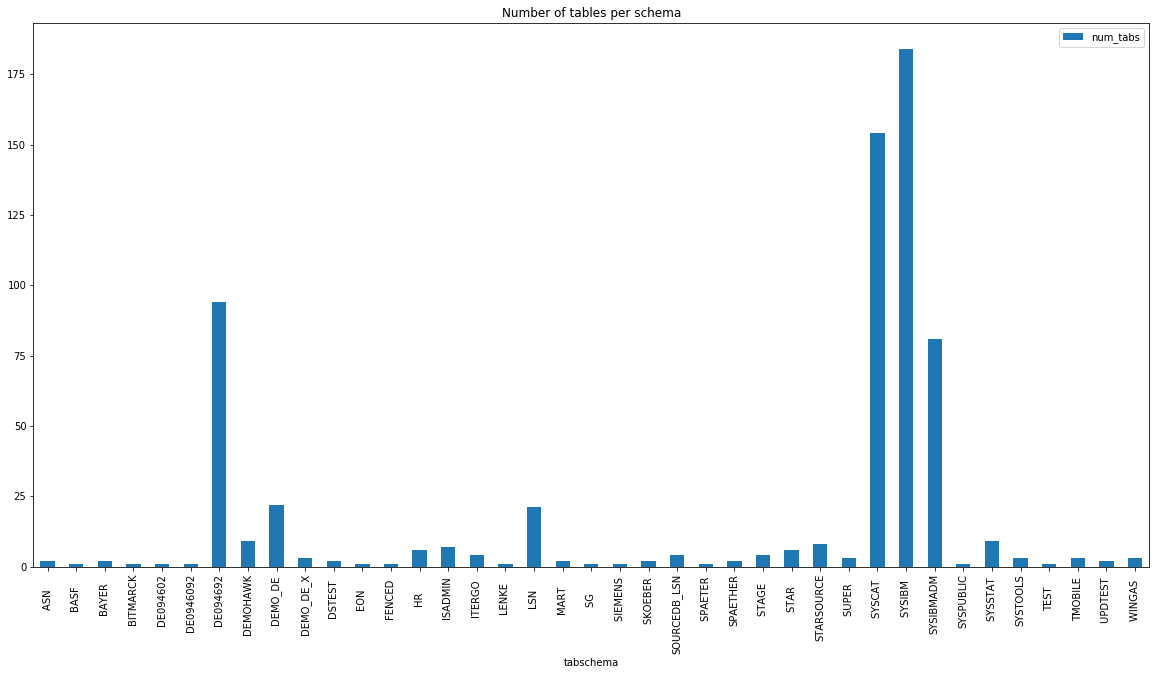

In [56]:
sql_text = "select tabschema, count(*) as num_tabs from syscat.tables group by tabschema"

try:
    df = pandas.read_sql_query(sql_text, connection)
except exc.SQLAlchemyError as ex:
    print('We got a problem......:' + ex)

# Standard data frame index is "index". Therefore, the index has to be redefined for charts (grouping by index)
df.set_index('tabschema', inplace=True)    
  
qpl = df.plot(kind='bar', title="Number of tables per schema",figsize=(20,10));

[Back to Top](#top)
<a id='mpsort'></a>

### Some more advanced features incl. bar sorting

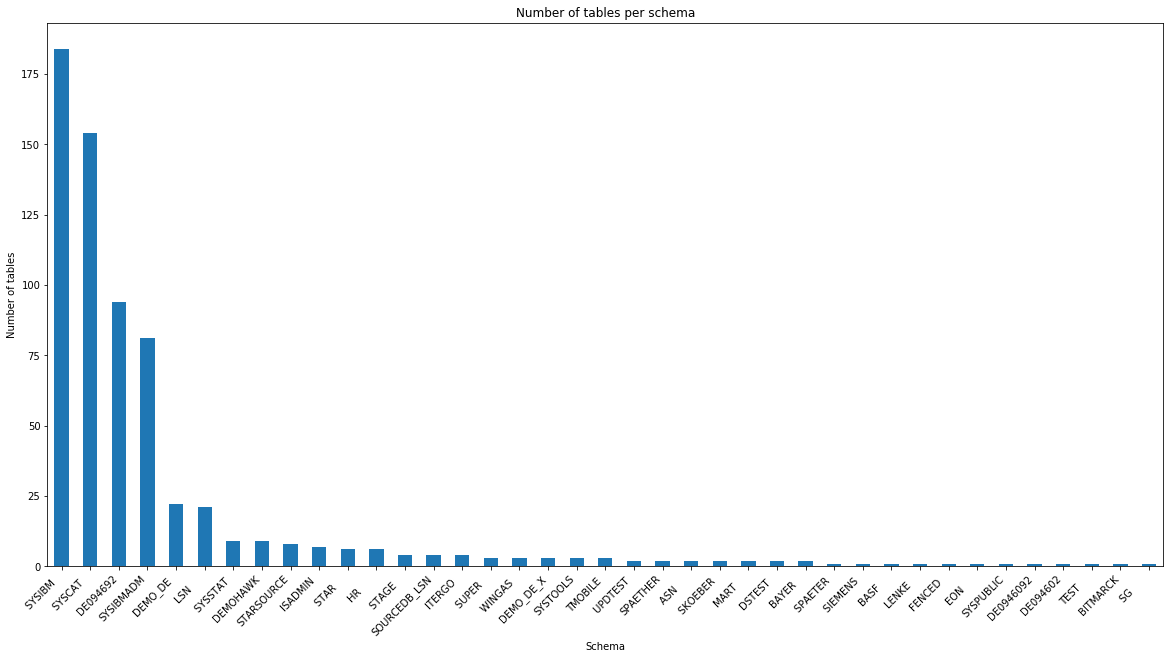

In [57]:
# Same frame as above

# remove legend
# set axis labels
# sort bars
# print xticks with rotation

# Sort values by number of tables
qpl = df.sort_values('num_tabs',ascending=False).plot(kind='bar', 
                                                      title="Number of tables per schema",
                                                      figsize=(20,10),
                                                      legend=None)
qpl.set_xlabel("Schema")
qpl.set_ylabel("Number of tables")

# legend rotation
for item in qpl.get_xticklabels():
    item.set_rotation(45)   
    item.set_horizontalalignment('right')
    item.set_verticalalignment('top')

[Back to Top](#top)
<a id='mplogic'></a>

### Where to put the logic? Simpler and more flexible in Notebook! 

Logic in SQL

In [58]:
# Construction of a result set by counting different table types by schema and by joining 
# the results
# Looks like this:
# TABSCHEMA  TABLES VIEWS ALIASES
# ---------- ------ ----- -------
# S1         100    12    2
# S2         100    12    2
# ....

sql_text = "select A.tabschema, A.TABLES, B.VIEWS, C.NICKNAMES, D.ALIASES from ( \
    (select tabschema, count(*) as TABLES  \
       from syscat.tables where type = 'T'  \
       group by tabschema)  A  \
    left outer join   \
    (select tabschema, count(*) as VIEWS  \
       from syscat.tables where type = 'V'  \
       group by tabschema)  B  \
    ON  A.tabschema = B.tabschema  \
    left outer join   \
    (select tabschema, count(*) as NICKNAMES  \
       from syscat.tables where type = 'N'  \
       group by tabschema)  C  \
    ON B.tabschema = C.tabschema  \
    left outer join   \
    (select tabschema, count(*) as ALIASES  \
       from syscat.tables where type = 'A'  \
       group by tabschema)  D  \
    ON C.tabschema = D.tabschema );"

try:
    df = pandas.read_sql_query(sql_text, connection)
except exc.SQLAlchemyError as ex:
    print('We got a problem......:' + ex)

df

,tabschema,tables,views,nicknames,aliases
0,DE094692,66,20.0,None,None
1,DEMO_DE,21,1.0,None,None
2,DEMO_DE_X,2,1.0,None,None
3,STAR,5,1.0,None,None
4,SYSIBM,147,37.0,None,None
5,ASN,2,NaN,None,None
6,BASF,1,NaN,None,None
7,BAYER,2,NaN,None,None
8,BITMARCK,1,NaN,None,None
9,DE094602,1,NaN,None,None


Text(0,0.5,'Schema')

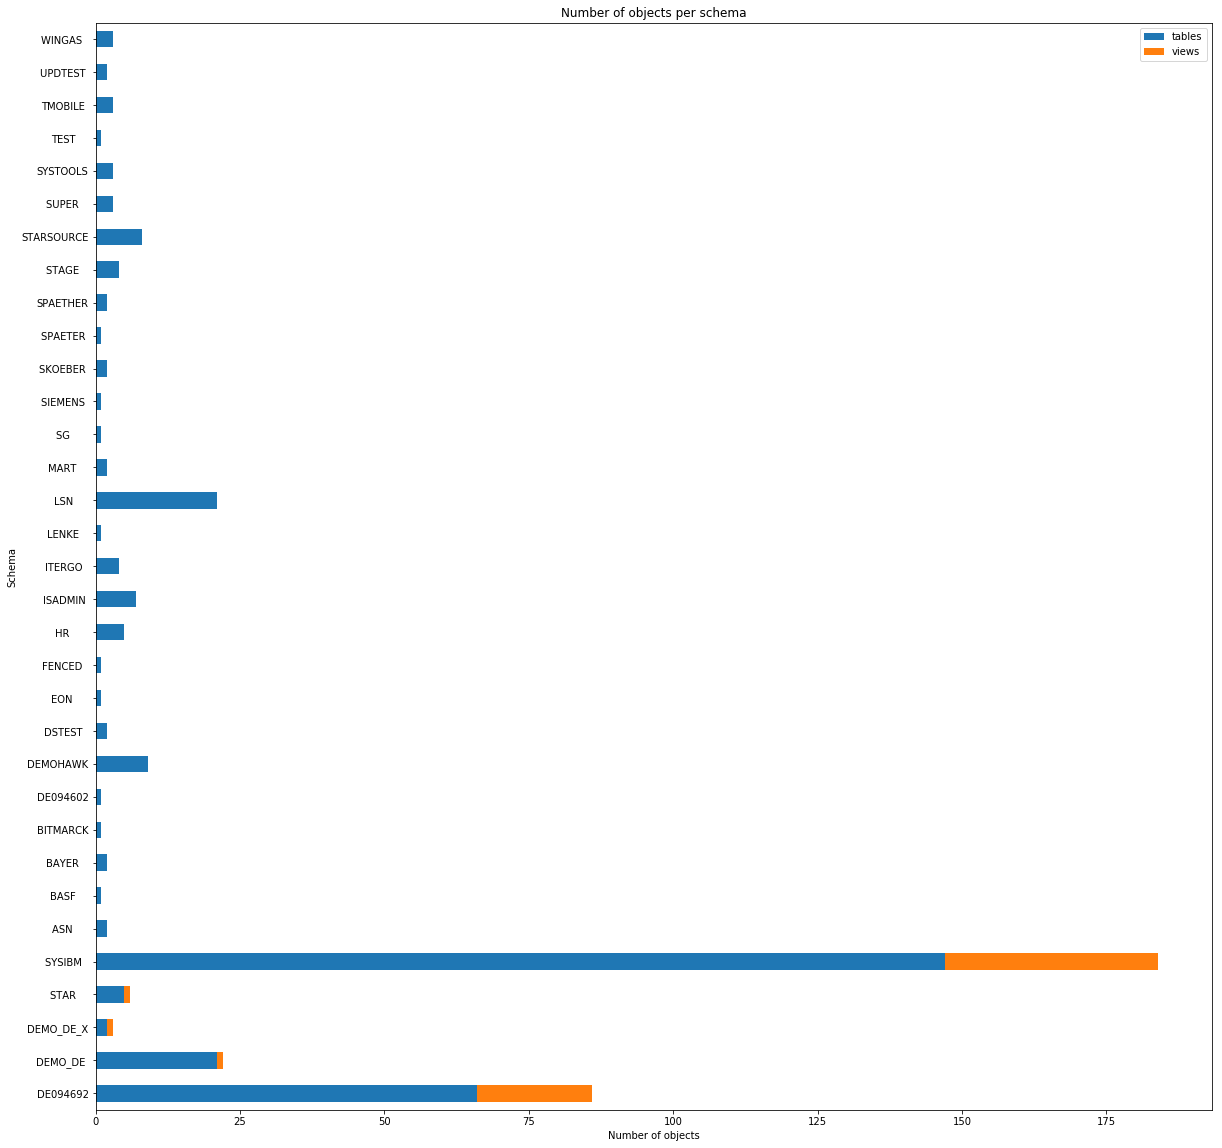

In [59]:
df.set_index('tabschema', inplace=True) 

my_plot = df.plot(kind='barh', 
                  stacked=True, 
                  title="Number of objects per schema",
                  figsize=(20,20))
my_plot.set_xlabel("Number of objects")
my_plot.set_ylabel("Schema")

Logic in python

In [60]:
# Construction of a result set by counting different table types by schema and type
# Looks like this:
# TABSCHEMA  TABNAME TYPE 
# ---------- ------- ----
# S1         TAB1    T
# S1         VIEWA   V
# S2         TAB1    T
# ....

sql_text = "select tabschema, tabname, type from syscat.tables;"

try:
    df = pandas.read_sql_query(sql_text, connection)
except exc.SQLAlchemyError as ex:
    print('We got a problem......:' + ex)

df

,tabschema,tabname,TYPE
0,SYSIBM,SYSVIEWDEP,T
1,SYSIBM,SYSPLANDEP,T
2,SYSIBM,SYSSECTION,T
3,SYSIBM,SYSSTMT,T
4,SYSIBM,SYSDBAUTH,T
5,SYSIBM,SYSPLANAUTH,T
6,SYSIBM,SYSTABAUTH,T
7,SYSIBM,SYSINDEXAUTH,T
8,SYSIBM,SYSRELS,T
9,SYSIBM,SYSROUTINEPARMS,T


In [61]:
df.drop(columns='tabname')

df_group = df.groupby(['tabschema','TYPE']).size()

df_group


tabschema     TYPE      2
ASN           T         1
BASF          T         2
BAYER         T         1
BITMARCK      T         1
DE094602      T         1
DE0946092     V         5
DE094692      A         3
              S        66
              T        20
              V         9
DEMOHAWK      T        21
DEMO_DE       T         1
              V         2
DEMO_DE_X     T         1
              V         2
DSTEST        T         1
EON           T         1
FENCED        T         1
HR            S         5
              T         7
ISADMIN       T         4
ITERGO        T         1
LENKE         T        21
LSN           T         2
MART          T         1
SG            T         1
SIEMENS       T         2
SKOEBER       T         4
SOURCEDB_LSN  N         1
SPAETER       T         2
SPAETHER      T         4
STAGE         T         5
STAR          T         1
              V         8
STARSOURCE    T         3
SUPER         T       154
SYSCAT        V       147
SYSIBM     

In [62]:
# pivotierung
df_group.unstack()

TYPE,A,N,S,T,V
tabschema,,,,,
ASN,NaN,NaN,NaN,2.0,NaN
BASF,NaN,NaN,NaN,1.0,NaN
BAYER,NaN,NaN,NaN,2.0,NaN
BITMARCK,NaN,NaN,NaN,1.0,NaN
DE094602,NaN,NaN,NaN,1.0,NaN
DE0946092,NaN,NaN,NaN,NaN,1.0
DE094692,5.0,NaN,3.0,66.0,20.0
DEMOHAWK,NaN,NaN,NaN,9.0,NaN
DEMO_DE,NaN,NaN,NaN,21.0,1.0


Text(0,0.5,'Schema')

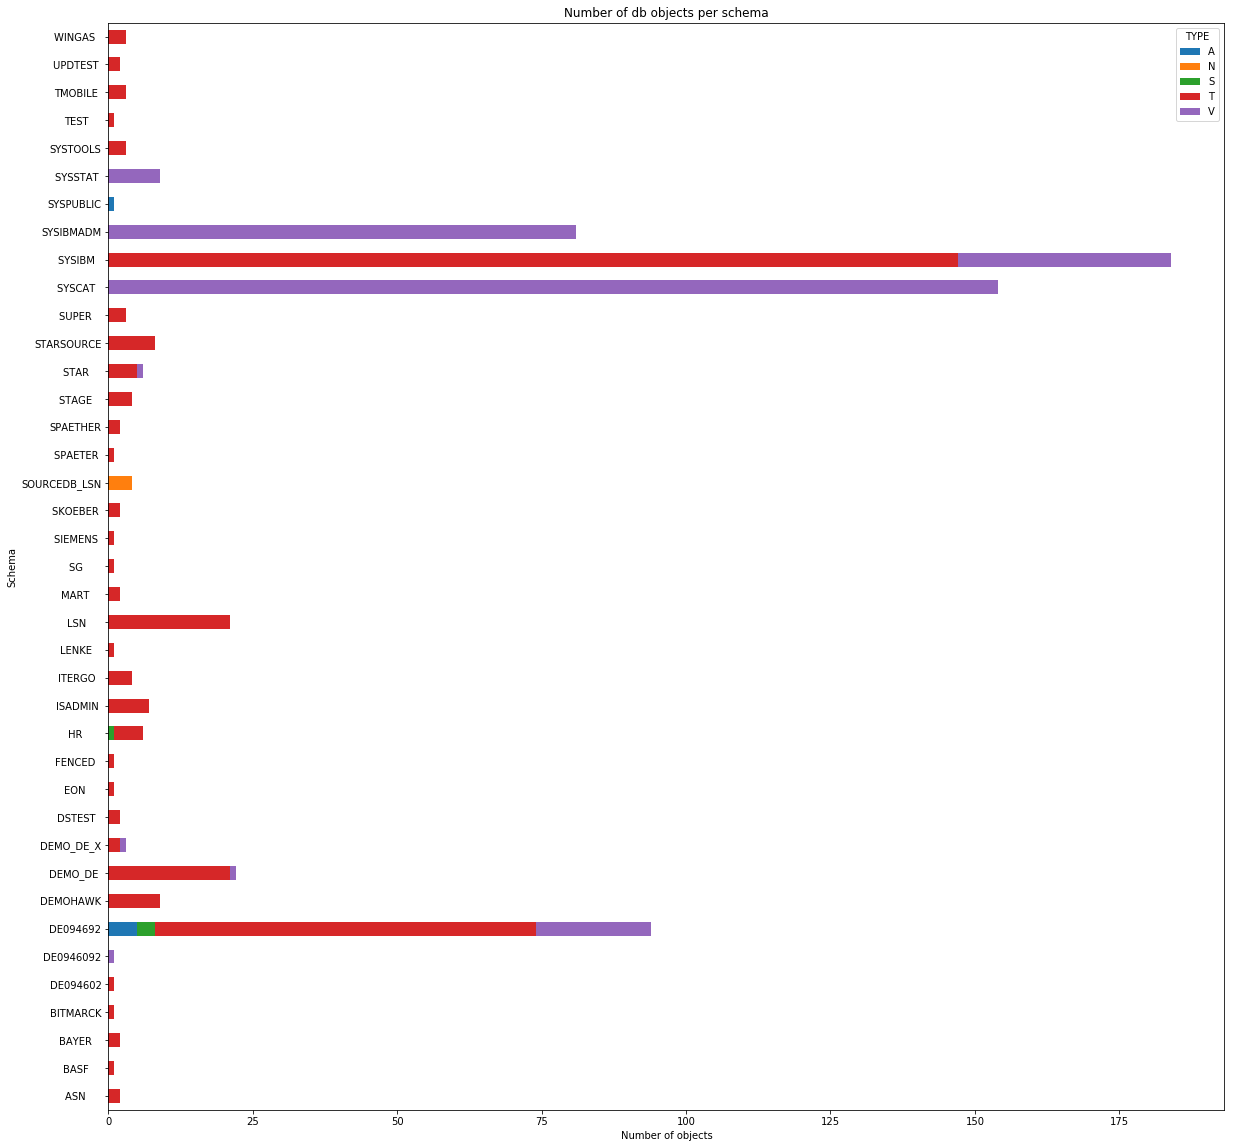

In [63]:
my_plot = df_group.unstack().plot(kind='barh', 
                                  stacked=True, 
                                  title="Number of db objects per schema",
                                  figsize=(20,20))
my_plot.set_xlabel("Number of objects")
my_plot.set_ylabel("Schema")

[Back to Top](#top)
<a id='mpline'></a>

### Line graphs / multiple lines

Sample data

In [64]:
%sql drop table fig_data;
%sql create table fig_data(week_day varchar(20), num_apples int, kg_cherries dec(5 , 2))
%sql delete from  fig_data;
%sql insert into  fig_data values ('Monday', 20, 1.2), ('Tuesday', 55, 0.7), \
                                  ('Wedneday', 37, 0.3), ('Tursday', 43, 0.2), \
                                  ('Friday', 24, 0.7), ('Saturday', 40, 1.8), \
                                  ('Sunday', 33, 0.8);

Command completed.
Command completed.


Command completed.
Command completed.


Creating a data frame from a query

In [65]:
sql_text = "select week_day, num_apples, kg_cherries from fig_data"

try:
    df = pandas.read_sql_query(sql_text, connection)
except exc.SQLAlchemyError as ex:
    print('We got a problem......:' + ex)

#df.set_index('week_day', inplace=True)     
    
print(df)

   week_day  num_apples  kg_cherries
0    Monday          20          1.2
1   Tuesday          55          0.7
2  Wedneday          37          0.3
3   Tursday          43          0.2
4    Friday          24          0.7
5  Saturday          40          1.8
6    Sunday          33          0.8


Standard plotting (lnie chart)

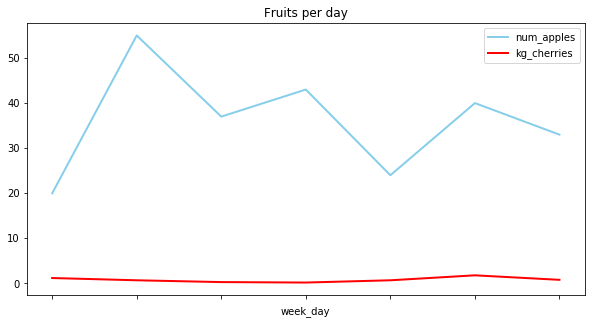

In [66]:
df.plot(x='week_day',y=['num_apples','kg_cherries'],
        kind='line', 
        figsize=(10,5), 
        linewidth=2, 
        linestyle='-', 
        title="Fruits per day",
        color=['skyblue','red'])

# Remark:
# Index of the data frame is used for x axes labeling

Text(0,0.5,'Harvest')

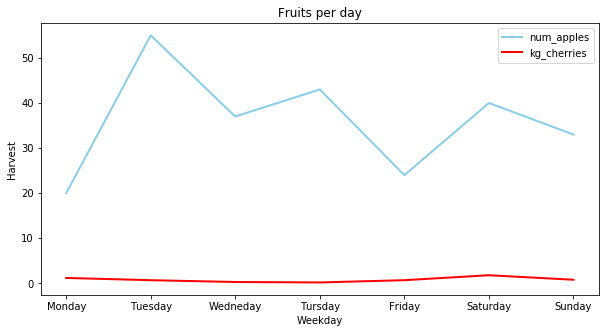

In [67]:
pldf = df.plot(x='week_day',y=['num_apples','kg_cherries'],
        kind='line', 
        figsize=(10,5), 
        linewidth=2, 
        linestyle='-', 
        title="Fruits per day",
        color=['skyblue','red'])

# defining df column "week_day" as x axes labels
plt.xticks(df.index,df["week_day"].values)

pldf.set_xlabel("Weekday")
pldf.set_ylabel("Harvest")

[Back to Top](#top)
<a id='mpsubplots'></a>

### Subplots (unterschiedliche Axen)

In [68]:
print(df)

   week_day  num_apples  kg_cherries
0    Monday          20          1.2
1   Tuesday          55          0.7
2  Wedneday          37          0.3
3   Tursday          43          0.2
4    Friday          24          0.7
5  Saturday          40          1.8
6    Sunday          33          0.8


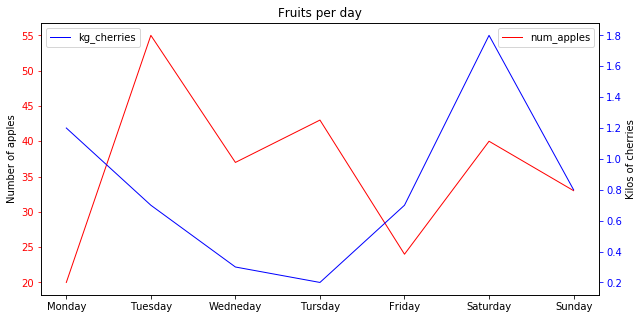

In [69]:
fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(111,title='Fruits per day')
ax2 = ax1.twinx()

# the ax keyword sets the axis that the data frame plots to
df.plot(ax=ax1, y='num_apples', linewidth=1, linestyle='-', color='r')
#plt.legend(loc='upper right')
df.plot(ax=ax2, y='kg_cherries', linewidth=1, linestyle='-', color='b')
plt.legend(loc='upper left')

ax1.set_ylabel('Number of apples')
ax2.set_ylabel('Kilos of cherries')

ax1.tick_params(axis='y', colors='r')
ax2.tick_params(axis='y', colors='b')

plt.xticks(df.index,df['week_day'].values)

plt.show()

[Back to Top](#top)
<a id='mpmouseover'></a>

### in Arbeit - Mouseover / Tooltips

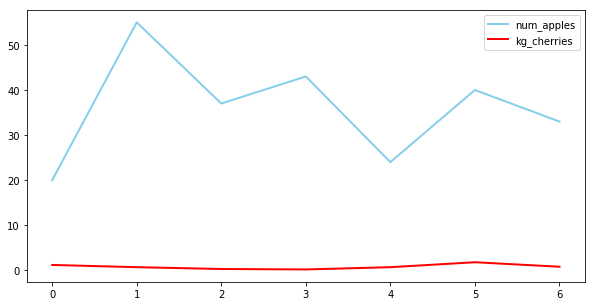

In [70]:
#!pip install mplcursors
import mplcursors

mplcursors.cursor(hover=True)

df.plot(kind='line', figsize=(10,5), linewidth=2, linestyle='-', color=['skyblue','red'])

[Back to Top](#top)
<a id='pandas_experiments'></a>

## Some experiments with Pandas

### Joins

In [ ]:
import pandas as pd

In [23]:
# initialize 1st list of lists 
data = [['2019-11-05 09:25:11.760', 1000], ['2019-11-05 09:25:31.760', 2000], ['2019-11-05 09:25:51.760', 2500], 
        ['2019-11-05 09:26:11.760', 3100], ['2019-11-05 09:26:31.760', 3300], ['2019-11-05 09:26:51.760', 4000], 
        ['2019-11-05 09:27:11.760', 4400], ['2019-11-05 09:27:31.760', 5300], ['2019-11-05 09:27:51.760', 6300]] 
  
# Create the pandas DataFrame 
df1 = pd.DataFrame(data, columns = ['d1.timestamp', 'd1.throughput']) 
df2 = pd.DataFrame(data, columns = ['d2.timestamp', 'd2.throughput']) 

# print dataframe. 
df2 

,d2.timestamp,d2.throughput
0,2019-11-05 09:25:11.760,1000
1,2019-11-05 09:25:31.760,2000
2,2019-11-05 09:25:51.760,2500
3,2019-11-05 09:26:11.760,3100
4,2019-11-05 09:26:31.760,3300
5,2019-11-05 09:26:51.760,4000
6,2019-11-05 09:27:11.760,4400
7,2019-11-05 09:27:31.760,5300
8,2019-11-05 09:27:51.760,6300


In [24]:
# shift index of df2
df1.index += 1
  
df1

,d1.timestamp,d1.throughput
1,2019-11-05 09:25:11.760,1000
2,2019-11-05 09:25:31.760,2000
3,2019-11-05 09:25:51.760,2500
4,2019-11-05 09:26:11.760,3100
5,2019-11-05 09:26:31.760,3300
6,2019-11-05 09:26:51.760,4000
7,2019-11-05 09:27:11.760,4400
8,2019-11-05 09:27:31.760,5300
9,2019-11-05 09:27:51.760,6300


In [25]:
# join df1 and df2 by index
# df_result = pd.concat([df2['timestamp'], df1],axis=1)

df_result = pd.concat([df1, df2], axis=1, join='inner')

df_result

,d1.timestamp,d1.throughput,d2.timestamp,d2.throughput
1,2019-11-05 09:25:11.760,1000,2019-11-05 09:25:31.760,2000
2,2019-11-05 09:25:31.760,2000,2019-11-05 09:25:51.760,2500
3,2019-11-05 09:25:51.760,2500,2019-11-05 09:26:11.760,3100
4,2019-11-05 09:26:11.760,3100,2019-11-05 09:26:31.760,3300
5,2019-11-05 09:26:31.760,3300,2019-11-05 09:26:51.760,4000
6,2019-11-05 09:26:51.760,4000,2019-11-05 09:27:11.760,4400
7,2019-11-05 09:27:11.760,4400,2019-11-05 09:27:31.760,5300
8,2019-11-05 09:27:31.760,5300,2019-11-05 09:27:51.760,6300


In [29]:
df_result['throughput_diff'] = df_result['d2.throughput'] - df_result['d1.throughput']

df_result

,d1.timestamp,d1.throughput,d2.timestamp,d2.throughput,throughput_diff
1,2019-11-05 09:25:11.760,1000,2019-11-05 09:25:31.760,2000,1000
2,2019-11-05 09:25:31.760,2000,2019-11-05 09:25:51.760,2500,500
3,2019-11-05 09:25:51.760,2500,2019-11-05 09:26:11.760,3100,600
4,2019-11-05 09:26:11.760,3100,2019-11-05 09:26:31.760,3300,200
5,2019-11-05 09:26:31.760,3300,2019-11-05 09:26:51.760,4000,700
6,2019-11-05 09:26:51.760,4000,2019-11-05 09:27:11.760,4400,400
7,2019-11-05 09:27:11.760,4400,2019-11-05 09:27:31.760,5300,900
8,2019-11-05 09:27:31.760,5300,2019-11-05 09:27:51.760,6300,1000
